In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!dir {r'celeb\train\jennifer-lawrence'}

 Volume in drive C is Windows
 Volume Serial Number is A60D-61E1

 Directory of C:\Users\conne\Documents\Data Science\Deep Learning\celeb\train\jennifer-lawrence

09/03/2018  01:59 PM    <DIR>          .
09/03/2018  01:59 PM    <DIR>          ..
09/03/2018  01:35 PM           523,633 j (101).jpg
09/03/2018  01:34 PM           240,165 j (104).jpg
09/03/2018  01:34 PM           410,007 j (105).jpg
09/03/2018  01:34 PM           388,601 j (106).jpg
09/03/2018  01:34 PM           352,509 j (107).jpg
09/03/2018  01:34 PM           398,084 j (108).jpg
09/03/2018  01:35 PM           229,427 j (109).jpg
09/03/2018  01:35 PM           244,549 j (110).jpg
09/03/2018  01:35 PM           206,333 j (111).jpg
09/03/2018  01:34 PM           418,185 j (112).jpg
09/03/2018  01:34 PM           210,646 j (113).jpg
09/03/2018  01:34 PM           176,333 j (114).jpg
09/03/2018  01:34 PM           338,655 j (115).jpg
09/03/2018  01:34 PM           357,252 j (116).jpg
09/03/2018  01:34 PM           173,481 j

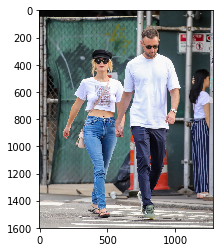

In [10]:
import matplotlib.pyplot as plt
img = plt.imread(r'celeb\train\jennifer-lawrence\j (129).jpg')
plt.imshow(img)

In [11]:
img.shape

(1600, 1280, 3)

In [12]:
img[:4,:4]

array([[[5, 7, 6],
        [5, 7, 6],
        [5, 7, 6],
        [5, 7, 6]],

       [[5, 7, 6],
        [5, 7, 6],
        [5, 7, 6],
        [5, 7, 6]],

       [[5, 7, 6],
        [5, 7, 6],
        [5, 7, 6],
        [5, 7, 6]],

       [[5, 7, 6],
        [5, 7, 6],
        [5, 7, 6],
        [5, 7, 6]]], dtype=uint8)

In [13]:
import os
os.chdir(r"C:\Users\conne\Documents\Data Science\Deep Learning\celeb\train")

In [14]:
!dir {r'ariel-winter'}

 Volume in drive C is Windows
 Volume Serial Number is A60D-61E1

 Directory of C:\Users\conne\Documents\Data Science\Deep Learning\celeb\train\ariel-winter

09/03/2018  01:58 PM    <DIR>          .
09/03/2018  01:58 PM    <DIR>          ..
09/03/2018  01:26 PM           222,889 a (1).jpg
09/03/2018  01:25 PM           152,387 a (436).jpg
09/03/2018  01:25 PM           111,273 a (437).jpg
09/03/2018  01:25 PM           244,221 a (438).jpg
09/03/2018  01:25 PM           310,356 a (439).jpg
09/03/2018  01:25 PM           233,854 a (440).jpg
09/03/2018  01:25 PM           237,324 a (441).jpg
09/03/2018  01:25 PM           214,309 a (444).jpg
09/03/2018  01:25 PM           275,150 a (445).jpg
09/03/2018  01:25 PM           235,744 a (446).jpg
09/03/2018  01:25 PM           311,313 a (447).jpg
09/03/2018  01:25 PM           275,941 a (448).jpg
09/03/2018  01:25 PM           342,235 a (449).jpg
09/03/2018  01:25 PM           276,184 a (450).jpg
09/03/2018  01:26 PM           211,046 a (451).

In [22]:
from __future__ import print_function, division

import numpy as np
import random
import os
import glob
# https://opencv.org/
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv

from scipy.misc import imresize, imsave

from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle

from PIL import Image, ImageChops, ImageOps

import matplotlib.pyplot as plt

from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense


In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras



In [33]:

# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

# augment the data that we have
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# prepare training data
training_data = train_datagen.flow_from_directory(r'.',
                                                 target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

# prepare test data
test_data = test_datagen.flow_from_directory(r'C:\Users\conne\Documents\Data Science\Deep Learning\celeb\valid',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')


Found 1302 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [43]:
 #Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# make 32 feature detectors with a size of 3x3
# choose the input-image's format to be 64x64 with 3 channels
classifier.add(Conv2D(32, (3, 3),strides=(1,1), input_shape=(32, 32, 3), activation="relu"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(3,activation="softmax"))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [26]:
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(32, 32 ,3)))

model.add(Conv2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1")`
  after removing the cwd from sys.path.
C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2")`
  
C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_2")`
  if sys.path[0] == '':
C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3

In [27]:
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

In [31]:
model.fit_generator(training_data,
                    samples_per_epoch=1302,
                         steps_per_epoch = (4000 / 32),
                         epochs = 4,
                         validation_data = test_data,
                         nb_val_samples= 150)

C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
C:\Users\conne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=40, epochs=4, validation_data=<keras_pre..., validation_steps=150)`
  


Epoch 1/4
40/40 [==============================] - 248s 6s/step - loss: 1.0986 - acc: 0.3390 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 2/4
40/40 [==============================] - 245s 6s/step - loss: 1.0986 - acc: 0.3411 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 3/4
40/40 [==============================] - 246s 6s/step - loss: 1.0985 - acc: 0.3445 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 4/4
40/40 [==============================] - 245s 6s/step - loss: 1.0984 - acc: 0.3515 - val_loss: 1.0986 - val_acc: 0.3333


In [36]:
from keras import applications
from keras.models import Sequential, Model

img_width, img_height = 224, 224
nb_train_samples = 1302
nb_validation_samples = 150
epochs = 5
batch_size = 20

model = applications.VGG16(weights='imagenet', include_top=False , input_shape=(224,224,3))
print('Model loaded.')

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu',name='newlayer'))
top_model.add(Dropout(0.5))
top_model.add(Dense(3, activation='softmax'))

model = Model(inputs= model.input, outputs= top_model(model.output))


for layer in model.layers[:19]:
    layer.trainable = False


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])


Model loaded.


In [37]:
model.fit_generator(
    training_data,
    steps_per_epoch=nb_train_samples// batch_size,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=nb_validation_samples)

Epoch 1/5
65/65 [==============================] - 199s 3s/step - loss: 1.1017 - acc: 0.4922 - val_loss: 0.7420 - val_acc: 0.6869
Epoch 2/5
65/65 [==============================] - 200s 3s/step - loss: 0.8033 - acc: 0.6277 - val_loss: 0.6076 - val_acc: 0.7734
Epoch 3/5
65/65 [==============================] - 198s 3s/step - loss: 0.7078 - acc: 0.6817 - val_loss: 0.5748 - val_acc: 0.7812
Epoch 4/5
65/65 [==============================] - 224s 3s/step - loss: 0.6076 - acc: 0.7399 - val_loss: 0.5188 - val_acc: 0.7667
Epoch 5/5
65/65 [==============================] - 239s 4s/step - loss: 0.5484 - acc: 0.7847 - val_loss: 0.4854 - val_acc: 0.8060


In [71]:
model.save_weights('first_try.h5')

In [ ]:

# finally start computation
# to improve the model accuracy you can increase the number of steps_per_epoch to e.g. 8000
# increase the number of epochs to 5-25
# increase the validation steps
# this parametters allow for the model to optimize

classifier.fit_generator(training_data,
                         steps_per_epoch = (4000 / 32),
                         epochs = 1,
                         validation_data = test_data,
                         validation_steps = 2000)

Epoch 1/1
124/125 [============================>.] - ETA: 1s - loss: 1.0244 - acc: 0.4679

1.0##4.630429e-16##4.2478085e-08
1.0##0.0##1.3004829e-33
1.0##0.0##0.0
1.0##0.0##0.0


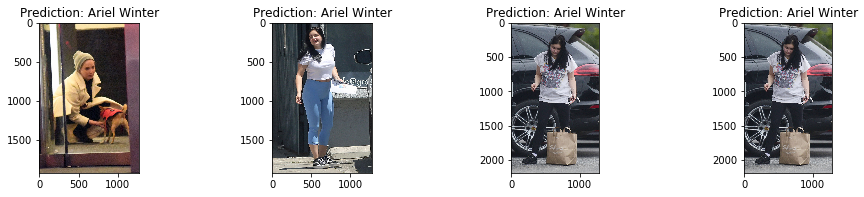

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
ran=np.random.randint(low=1, high=60, size=5)
shown = []

for i in range(1, len(ran)):
    k=ran[i]
    labelString = f"../test/1 ({k}).jpg"
    #print(labelString)
    shown.append(f"../test/1 ({k}).jpg")
    img=mpimg.imread(f"../test/1 ({k}).jpg")
    #img = f"../test1/{i}.jpg"
    subp=fig.add_subplot(rows, columns, i)
    subp.set_title(predict(labelString))
    plt.imshow(img)
    
plt.show()
#print(shown)

In [61]:
# to make predictions
import numpy as np
def predict(imagesToPredict):
    from keras.preprocessing import image
    test_image = image.load_img(imagesToPredict, target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    prediction =""
    print(str(result[0][0] ) +'##' + str(result[0][1] ) +'##' + str( result[0][2] ))
    # training_set.class_indices
    if result[0][0] > 0.8:
        prediction = 'Ariel Winter'
    elif(result[0][1] > 0.8):
        prediction = 'Jennifer Lawrence'
    elif(result[0][2] > 0.8):
        prediction = 'Kaley Cuoco'
        
    return ('Prediction: '+ prediction)